In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing data
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1461, step=1)

<Axes: xlabel='weather', ylabel='count'>

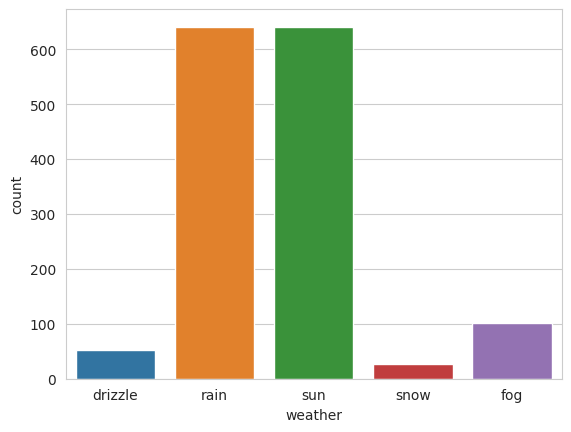

In [7]:
# countplot for weather using seaborn
sns.set_style('whitegrid')
sns.countplot(x='weather',data=df)

/home/rguktrkvalley/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


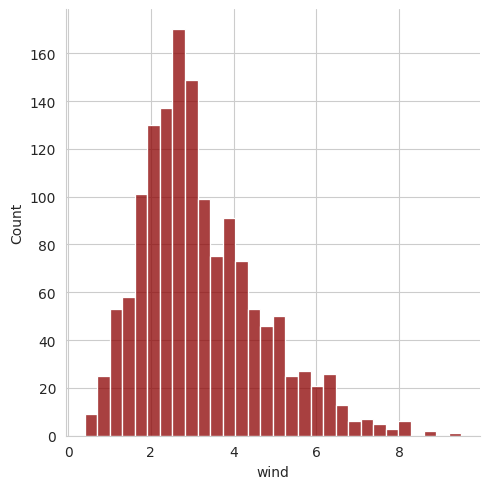

In [8]:
# displot for wind using seaborn 
sns.displot(df['wind'].dropna(),kde=False,color='darkred',bins=30)

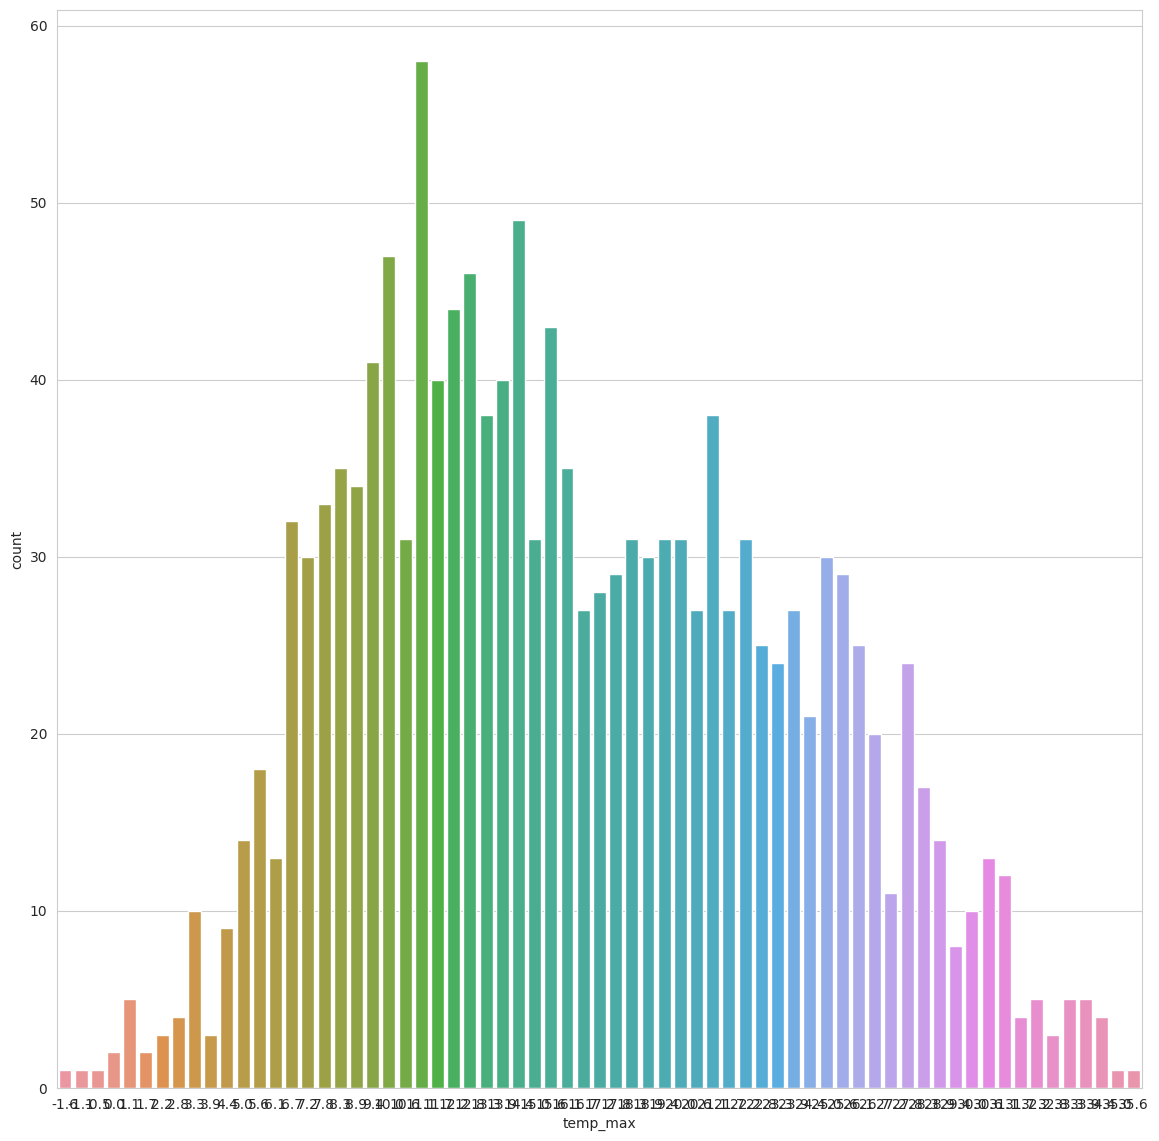

In [9]:
# countplot for temperature
plt.figure(figsize=(14, 14))
sns.countplot(x='temp_max',data=df)
plt.show()

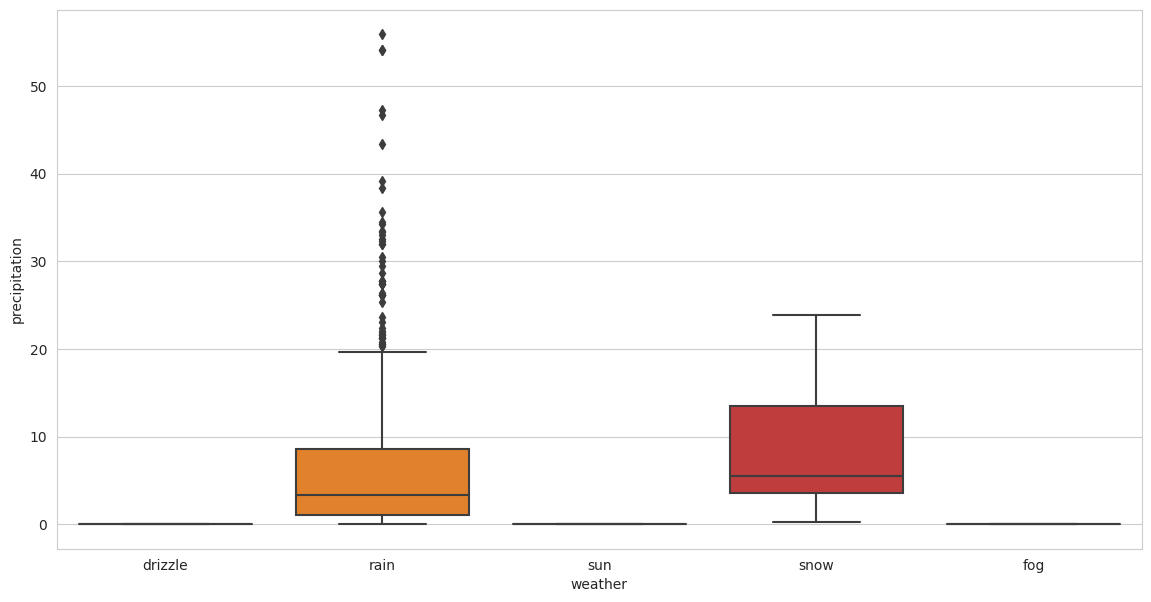

In [10]:
# Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='weather',y='precipitation',data=df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X=df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y=df['weather']
# print(X)
# print(y)

In [12]:
# splitting data into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=90)

In [13]:
# creating a LogisticRegression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [14]:
# training our model train data
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
# predicting our model output for X_test
predictions=model.predict(X_test)
predictions

array(['sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'snow', 'rain', 'sun', 'sun', 'rain', 'sun', 'r

In [16]:
# comparing our model predictions with actual output(y_test)
from sklearn.metrics import classification_report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        20
         fog       0.00      0.00      0.00        30
        rain       0.98      0.90      0.94       203
        snow       0.50      0.50      0.50         4
         sun       0.72      0.99      0.84       182

    accuracy                           0.83       439
   macro avg       0.44      0.48      0.46       439
weighted avg       0.76      0.83      0.79       439



/home/rguktrkvalley/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rguktrkvalley/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rguktrkvalley/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# checking model output for new data
test_df=pd.DataFrame([{'precipitation':0.0, 'temp_max':40, 'temp_min':30, 'wind':5.2}])
test_df

,precipitation,temp_max,temp_min,wind
0,0.0,40,30,5.2


In [18]:
model.predict(test_df)

array(['sun'], dtype=object)

In [19]:
test_df2=pd.DataFrame({'precipitation':2.0, 'temp_max':20, 'temp_min':14, 'wind':3.5},index=[0])
test_df2

,precipitation,temp_max,temp_min,wind
0,2.0,20,14,3.5


In [20]:
model.predict(test_df2)

array(['rain'], dtype=object)